# Effects of home environment on students' math literacy

### Investigation Overview
In this investigation, I would like to look at how the home environment has the influence over the literacy rates of the students. My questions are as follows. 


##### Q1. First I would like to find out how outside study hours are important for increasing math literacy rates. 

##### Q2. And, I would like to figure out which type of out-side-school study has the most impact over literacy rate.

##### Q3. Then, I would also like to figure out if social environment (e.g.  )family structure, parents' educational level have influence over literacy  or outside study hours. 

##### Q4. Also, how subjective norms have impact on literacy rates and out-of-shool study hours.  

### Dataset Overview
The OECD Programme for International Student Assessment (PISA) is an international assessment which aims to evaluate eduation systems worldwide by testing reading, mathematics and sciene literacy of 15-year-old students. 
The original Pisa data consisted of 485,490 students records with 636 columns. In my investigation I will be focusing on the following variables <br>

'CNT', 'ST35Q04', 'ST35Q05', 'ST35Q06', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'ST55Q04', 'ST57Q01', 'ST57Q02',
'ST57Q03', 'ST57Q04', 'ST57Q05', 'ST57Q06', 'FAMSTRUC', 'HISCED', 'HISEI', 'IMMIG', 'LMINS','MMINS', 'SMINS', 'OUTHOURS',
'SUBNORM','PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
pisa = pd.read_csv('pisa2012.csv', encoding="latin-1")

C:\Users\yukasato\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Select columns to use for my investigation
pisa = pisa[['CNT', 'ST35Q04', 'ST55Q01', 'ST55Q02', 'ST55Q03', 'ST55Q04', 'ST57Q01', 'ST57Q02',
'ST57Q03', 'ST57Q04', 'ST57Q05', 'ST57Q06', 'FAMSTRUC', 'HISCED', 'HISEI', 'IMMIG', 'LMINS','MMINS', 'SMINS', 'OUTHOURS',
'SUBNORM','PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']]

In [5]:
#removing records with missing data.

list = ['CNT', 'ST35Q04','ST55Q01', 'ST55Q02', 'ST55Q03', 'ST55Q04', 'ST57Q01', 'ST57Q02',
'ST57Q03', 'ST57Q04', 'ST57Q05', 'ST57Q06', 'FAMSTRUC', 'HISCED', 'HISEI', 'IMMIG', 'LMINS','MMINS', 'SMINS', 'OUTHOURS',
'SUBNORM', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']

for i in list:
    pisa.dropna(subset=[i], inplace=True)
pisa.shape

(86941, 36)

In [6]:
#Calculating the mean of plausible values in each subject and storing the values in new columns. 
pisa['READING'] = pisa[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
pisa['MATH'] = pisa[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
pisa['SCIENCE'] = pisa[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].mean(axis=1)

pisa.drop(['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
           'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
           'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], axis=1, inplace=True)

In [7]:
#Renaming columns 
pisa.rename(index=str, columns={'ST57Q01': 'HOMEWORK',
                                'ST57Q02': 'GUIDED_HOMEWORK',
                                'ST57Q03': 'PERSONAL_TUTOR',
                                'ST57Q04': 'COMMERCIAL_COMPANY',
                                'ST57Q05': 'WITH_PARENT',
                                'ST57Q06': 'COMPUTER',
                                'ST35Q04': 'SUBJECT_NORM_IN_MATH',
                                'ST55Q01': 'LLESSON',
                                'ST55Q02': 'MLESSON',
                                'ST55Q03': 'SLESSON',
                                'ST55Q04': 'OLESSON'}, inplace=True)

In [8]:
#HISCED reordering
level_order = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
ordered_ISCED = pd.api.types.CategoricalDtype(ordered= True, categories = level_order)
pisa['HISCED'] = pisa['HISCED'].astype(ordered_ISCED) 

In [9]:
#Lesson hours reordering
lesson_order = ['I do not attend <out-of-school time lessons> in this subject',
                'Less than 2 hours a week',
                '2 or more but less than 4 hours a week',
                '4 or more but less than 6 hours a week',
                '6 or more hours a week']
ordered_lhours = pd.api.types.CategoricalDtype(ordered= True, categories = lesson_order)
pisa[['LLESSON', 'MLESSON', 'SLESSON', 'OLESSON']] = pisa[['LLESSON', 'MLESSON', 'SLESSON', 'OLESSON']].astype(ordered_lhours) 

In [10]:
#dropping outliers 
drop_ind  = pisa[pisa.OUTHOURS > 60].index
pisa.drop(drop_ind, inplace=True)

In [11]:
#Creating a new categorical variables for 'HOMEWORK'
pisa['HWHOURS'] = pisa['HOMEWORK']

row_index_0 = pisa[pisa.HWHOURS == 0]['HWHOURS'].index
row_index_1 = pisa.query('HWHOURS  > 0 & HWHOURS  < 2')['HWHOURS'].index
row_index_2 = pisa.query('HWHOURS  >= 2  & HWHOURS  < 4')['HWHOURS'].index
row_index_3 = pisa.query('HWHOURS  >= 4  & HWHOURS  < 6')['HWHOURS'].index
row_index_4 = pisa.query('HWHOURS  >= 6')['HWHOURS'].index

pisa.loc[row_index_0, 'HWHOURS'] = '0 hours a week'
pisa.loc[row_index_1, 'HWHOURS'] = 'Less than 2 hours a week'
pisa.loc[row_index_2, 'HWHOURS'] = '2 or more but less than 4 hours a week'
pisa.loc[row_index_3, 'HWHOURS'] = '4 or more but less than 6 hours a week'
pisa.loc[row_index_4, 'HWHOURS'] = '6 or more hours a week'

#Reorder the categorical variable
hours_order = ['0 hours a week',
               'Less than 2 hours a week',
               '2 or more but less than 4 hours a week',
               '4 or more but less than 6 hours a week', 
               '6 or more hours a week']
ordered_hours = pd.api.types.CategoricalDtype(ordered= True, categories = hours_order)
pisa['HWHOURS'] = pisa['HWHOURS'].astype(ordered_hours) 

In [12]:
SUBNORM_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
ordered_SN = pd.api.types.CategoricalDtype(ordered= True, categories = SUBNORM_order)
pisa['SUBJECT_NORM_IN_MATH'] = pisa['SUBJECT_NORM_IN_MATH'].astype(ordered_SN) 

In [18]:
base_color = sb.color_palette()[0]

### Distribution of students' literacy rate
Students literacy rate in the dataset take on normally distributed values, from about 200 to about 800 at the highest with peak at around 500

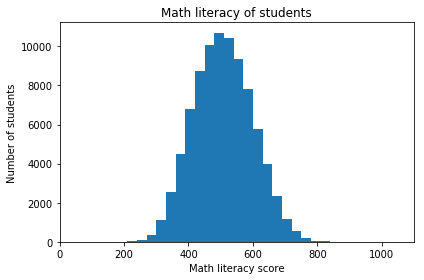

In [13]:

binsize = 30
bins = np.arange(0, pisa['MATH'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'MATH', bins = bins)
plt.xlim(0,1100)
plt.title('Math literacy of students')
plt.xlabel('Math literacy score')
plt.ylabel('Number of students')

plt.tight_layout();

### Distribution of Out-of-school study hours 
Out-side-school-study hours plots are all skewed to the right. 
Most of the students spend their time on doing their homework and time spent has a long-tailed distribution with a peak on less than 5 hours. 

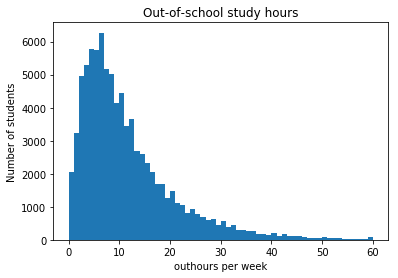

In [14]:
binsize = 1
bins = np.arange(0, 60+binsize, binsize)

plt.hist(data = pisa, x = 'OUTHOURS', bins = bins)
plt.title('Out-of-school study hours')
plt.ylabel('Number of students')
plt.xlabel('outhours per week');

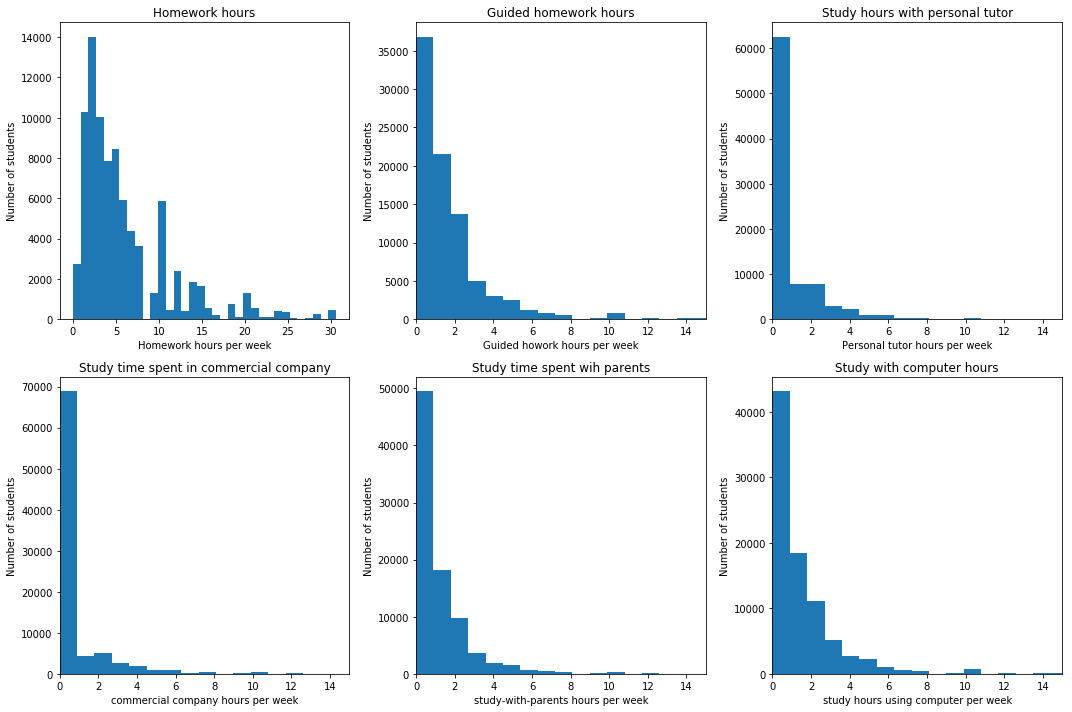

In [15]:
plt.figure(figsize = [15,10])

binsize = 0.9
bins = np.arange(0, 30+binsize, binsize)


plt.subplot(2,3,1)
plt.hist(data = pisa, x = 'HOMEWORK', bins = bins)
plt.title('Homework hours')
plt.ylabel('Number of students')
plt.xlabel('Homework hours per week');

plt.subplot(2,3,2)
plt.hist(data = pisa, x = 'GUIDED_HOMEWORK', bins = bins)
plt.xlim(0,15)
plt.title('Guided homework hours')
plt.ylabel('Number of students')
plt.xlabel('Guided howork hours per week');


plt.subplot(2,3,3)
plt.hist(data = pisa, x = 'PERSONAL_TUTOR', bins = bins)
plt.xlim(0,15)
plt.title('Study hours with personal tutor')
plt.ylabel('Number of students')
plt.xlabel('Personal tutor hours per week');

plt.subplot(2,3,4)
plt.hist(data = pisa, x = 'COMMERCIAL_COMPANY', bins = bins)
plt.xlim(0,15)
plt.title('Study time spent in commercial company')
plt.ylabel('Number of students')
plt.xlabel('commercial company hours per week');

plt.subplot(2,3,5)
plt.hist(data = pisa, x = 'WITH_PARENT', bins = bins)
plt.xlim(0,15)
plt.title('Study time spent wih parents')
plt.ylabel('Number of students')
plt.xlabel('study-with-parents hours per week');

plt.subplot(2,3,6)
plt.hist(data = pisa, x = 'COMPUTER', bins = bins)
plt.xlim(0,15)
plt.title('Study with computer hours')
plt.ylabel('Number of students')
plt.xlabel('study hours using computer per week')
plt.tight_layout();

### Destributions of students' family structures and Highest educational level of thier parents
Most students live with their parents and most of the parents falls unde ISCED 5A or 6 which stands for theoretically oriented tertiary and post-graduate shool. <br>

Note:<br>
`ISCED 1`  : Primary education or first stage of basic education<br>
`ISCED 2`  : Lower secondary education or second stage of basic education<br>
`ISCED 3B,C` : Vocational/pre-vocational upper secondary<br>
`ISCED 3A` : General upper secondary<br>
`ISCED 4`  : Post-secondary non-tertiary education<br>
`ISCED 5B` : First stage of tertiary education <br>
`ISCED 5A, 6` : Second stage of tertiary education<br>

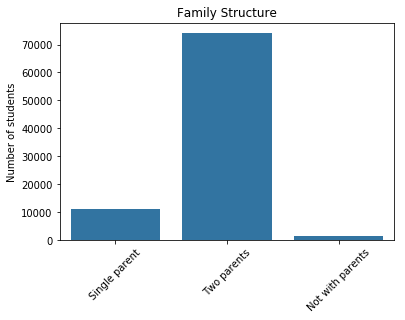

In [19]:
ticks_label = ['Single parent', 'Two parents', 'Not with parents']
ticks = np.arange(3)

sb.countplot(data = pisa, x = 'FAMSTRUC', color = base_color)
plt.title('Family Structure')
plt.xticks(ticks, ticks_label, rotation=45)
plt.ylabel('Number of students')
plt.xlabel(None);

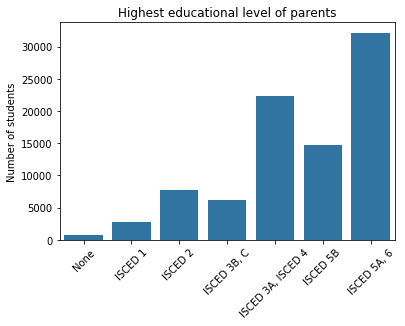

In [21]:
sb.countplot(data = pisa, x = 'HISCED', color = base_color)
plt.title("Highest educational level of parents")
plt.xticks(rotation=45)
plt.ylabel('Number of students')
plt.xlabel(None);

### Math literacy vs variables of interest (out-of-school study hours, homework hours and study hours with parents)

Out-of-school hours overall does not have any influence over how well students understand math. However, time spent on their homework has an positive liner relationship. It seems that the relations between study hours and math literacy varies in each method types.

In [22]:
student_samp = pisa.sample(500)

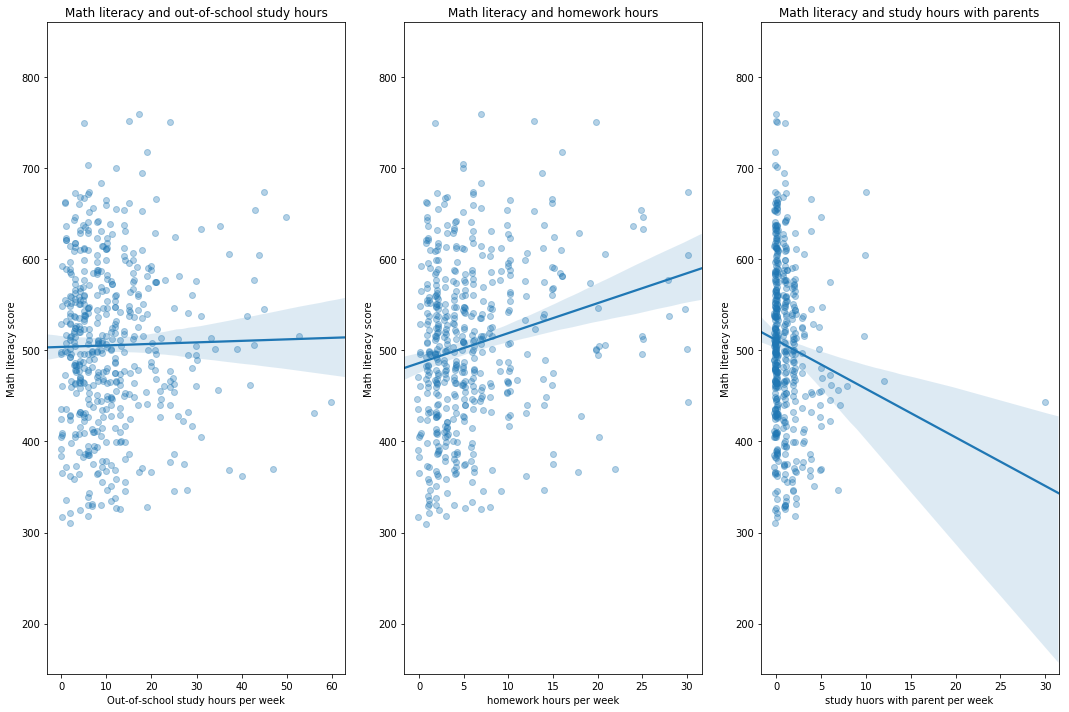

In [23]:
plt.figure(figsize = [15,10])

plt.subplot(1,3,1)
sb.regplot(data = student_samp, x = 'OUTHOURS', y = 'MATH',
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.ylim(145,860)
plt.title('Math literacy and out-of-school study hours')
plt.xlabel('Out-of-school study hours per week')
plt.ylabel('Math literacy score')

plt.subplot(1,3,2)
sb.regplot(data = student_samp, x = 'HOMEWORK', y = 'MATH',
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.ylim(145,860)
plt.title('Math literacy and homework hours')
plt.xlabel('homework hours per week')
plt.ylabel('Math literacy score')

plt.subplot(1,3,3)
sb.regplot(data = student_samp, x = 'WITH_PARENT', y = 'MATH',
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.ylim(145,860)
plt.title('Math literacy and study hours with parents')
plt.xlabel('study huors with parent per week')
plt.ylabel('Math literacy score')
plt.tight_layout();

### Math literacy vs. out-of-school math lessons and homework hours

Surprisingly, out-of-school lessons in math does not have clear influece over math literacy. By comparing average math literacy of the students who spend more than 6 hours on math lessons and those who do not attend such lessons, the latter scored the similar literacy rate as the former. Rather we can clearly see that average and entire math literacy of students increase as they spend more time on the homework. 

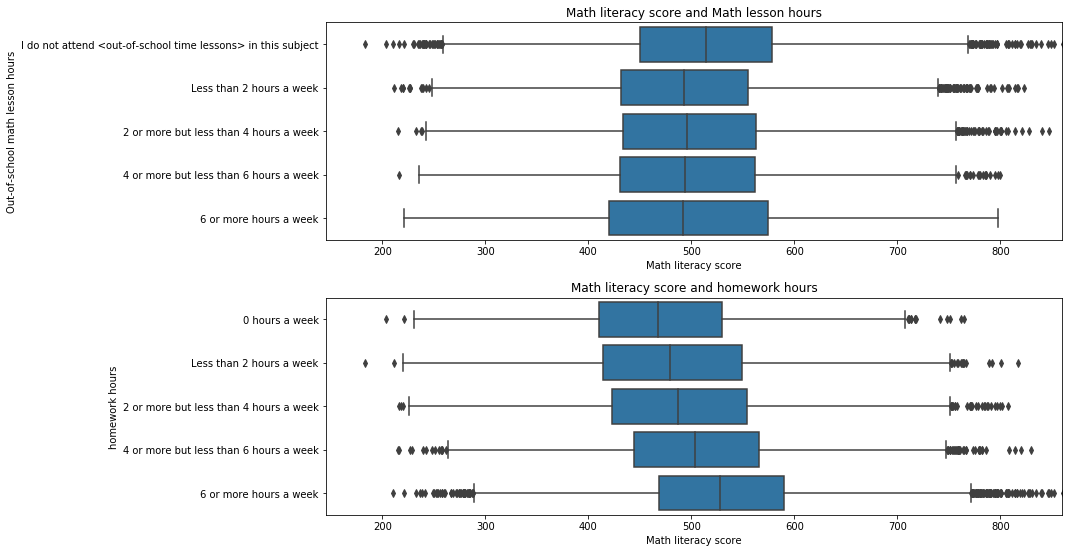

In [24]:
plt.figure (figsize= [15,15])

plt.subplot(4,1,1)
sb.boxplot(data = pisa, x = 'MATH', y = 'MLESSON', color = base_color)
plt.title('Math literacy score and Math lesson hours')
plt.xlim(145,860)
plt.ylabel('Out-of-school math lesson hours')
plt.xlabel('Math literacy score')

plt.subplot(4,1,2)
sb.boxplot(data = pisa, x = 'MATH', y = 'HWHOURS', color = base_color)
plt.title('Math literacy score and homework hours')
plt.xlim(145,860)
plt.ylabel('homework hours')
plt.xlabel('Math literacy score')

plt.tight_layout();

### Math literacy vs. family structure. 

We can see that clear drop in math literacy of those stuents who does not live with their parents. Although the math literacy rate shows significant difference, the time spend on homework does not differ too much. 


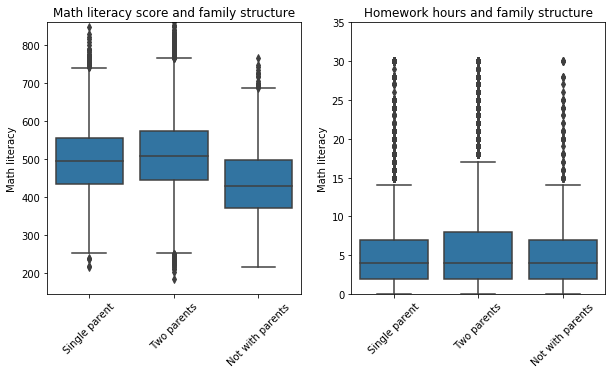

In [25]:
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]

ticks_label = ['Single parent', 'Two parents', 'Not with parents']
ticks = np.arange(3)

plt.subplot(1,2,1)
sb.boxplot(data = pisa, x = 'FAMSTRUC',  y = 'MATH',color = base_color)
plt.title('Math literacy score and family structure');
plt.ylabel('Math literacy')
plt.xticks(ticks, ticks_label, rotation=45)
plt.xlabel(None)
plt.ylim(145,860)

plt.subplot(1,2,2)
sb.boxplot(data = pisa, x = 'FAMSTRUC',  y = 'HOMEWORK', color = base_color)
plt.title('Homework hours and family structure');
plt.ylabel('Math literacy')
plt.xticks(ticks, ticks_label, rotation=45)
plt.ylim(0,35)
plt.xlabel(None);


### Math literacy vs. highest educational level of parents. 

Educational level of parents seems to have some sort of influence over the students' math literacy. Students who have parents with higher education seems to do well in math.  

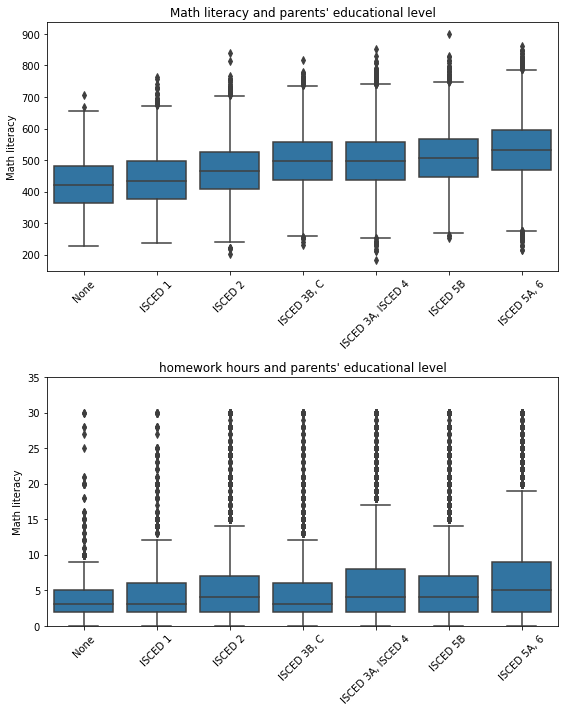

In [26]:
plt.figure(figsize = [8,10])
base_color = sb.color_palette()[0]

plt.subplot(2,1,1)
sb.boxplot(data = pisa, x = 'HISCED',  y = 'MATH',color = base_color)
plt.title("Math literacy and parents' educational level");
plt.ylabel('Math literacy')
plt.xlabel(None)
plt.xticks(rotation = 45)


plt.subplot(2,1,2)
sb.boxplot(data = pisa, x = 'HISCED',  y = 'HOMEWORK', color = base_color)
plt.title("homework hours and parents' educational level");
plt.ylabel('Math literacy')
plt.xlabel(None)
plt.xticks(rotation = 45)
plt.ylim(0,35)

plt.tight_layout();

### Average math literacy and hour spent on homework by family structure for highest educational level of parents.

As we can easily imagine from the above observation, for those students who does not live with their parents, the average math literacy rate is lower; among those students, the lower the educational level of the parents are, the lower the average math literacy tends to be. Similar characteristics can be found in homework hours the students spend. Amongst family structure, students who live with two parents tend to have higher math literacy rate.   

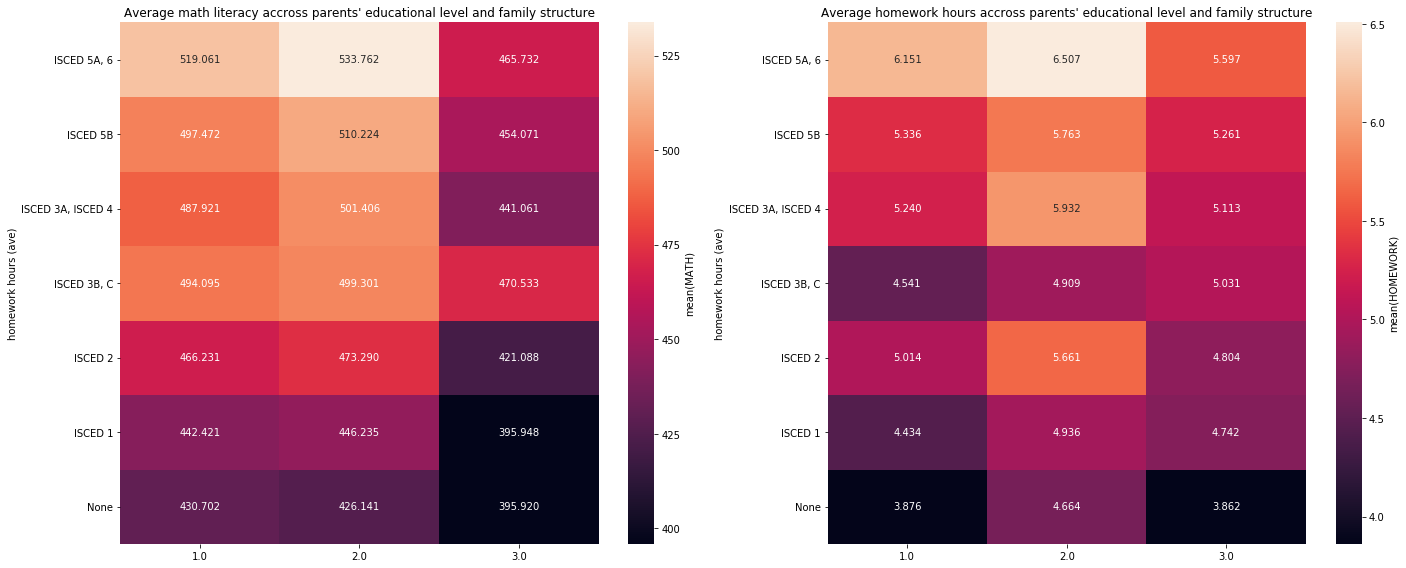

In [27]:
plt.figure(figsize = [20,8])

plt.subplot(1,2,1)
cat_means = pisa.groupby(['FAMSTRUC', 'HISCED']).mean()['MATH']
cat_means = cat_means.reset_index(name = 'MATH_avg')
cat_means = cat_means.pivot(index = 'HISCED', columns = 'FAMSTRUC',
                           values = 'MATH_avg')
ax =sb.heatmap(cat_means, annot = True, fmt = '.3f',
          cbar_kws = {'label' : 'mean(MATH)'})
ax.invert_yaxis()
plt.title("Average math literacy accross parents' educational level and family structure")
plt.ylabel('homework hours (ave)')
plt.xlabel(None)

plt.subplot(1,2,2)
cat_means = pisa.groupby(['FAMSTRUC', 'HISCED']).mean()['HOMEWORK']
cat_means = cat_means.reset_index(name = 'homework_avg')
cat_means = cat_means.pivot(index = 'HISCED', columns = 'FAMSTRUC',
                           values = 'homework_avg')
ax = sb.heatmap(cat_means, annot = True, fmt = '.3f',
          cbar_kws = {'label' : 'mean(HOMEWORK)'})
ax.invert_yaxis()
plt.title("Average homework hours accross parents' educational level and family structure")
plt.ylabel('homework hours (ave)')
plt.xlabel(None)


plt.tight_layout();

### Math literacy and homework hours by highest educational level of parents for subjective norms in math (parents believe studying math is important)

We can see how parents' belief in math encourage students to work on thier homework by plotting the average homework hours on highest educational level of parents. The higher the educational level of their parents have, the more the students spend time on homework. Within each level of parents' educational level, we can also observe an increse in homework hours on the parents' belief in math. As the parents more believe importance in math, the students spend more time on math. 

As if to represent the correlation, the math literacy shows the similar characteristics: the higher the education their parents have, the more math literacy the students have. Within each level of parents' educational level, we can see an increse in literacy rate on the parents' belief in math.

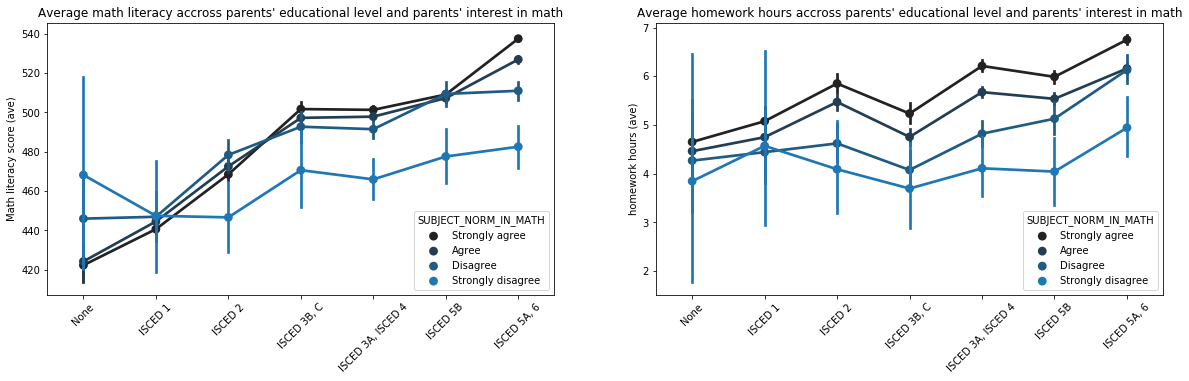

In [28]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sb.pointplot(data = pisa, x = 'HISCED', y = 'MATH', hue = 'SUBJECT_NORM_IN_MATH' ,color = base_color)
plt.title("Average math literacy accross parents' educational level and parents' interest in math")
plt.ylabel('Math literacy score (ave)')
plt.xlabel(None)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sb.pointplot(data = pisa, x = 'HISCED', y = 'HOMEWORK', hue = 'SUBJECT_NORM_IN_MATH' ,color = base_color)
plt.title("Average homework hours accross parents' educational level and parents' interest in math")
plt.ylabel('homework hours (ave)')
plt.xlabel(None)
plt.xticks(rotation=45);

### Math literacy and homework hours by family structure for subjective norms (parents believe studying math is important)

Reproducing the same plot with family structure instead of highest educational level of parents. It shows that there is steep drop in math literacy rate in students who do not live with their parent. 

The more the parents beleive in math, the better the stundens understand math and the more they do homework. By looking at each type of family structure, it is clear that the students who does no live with their parents scores low in terms of average math literacy and the hour they study. 

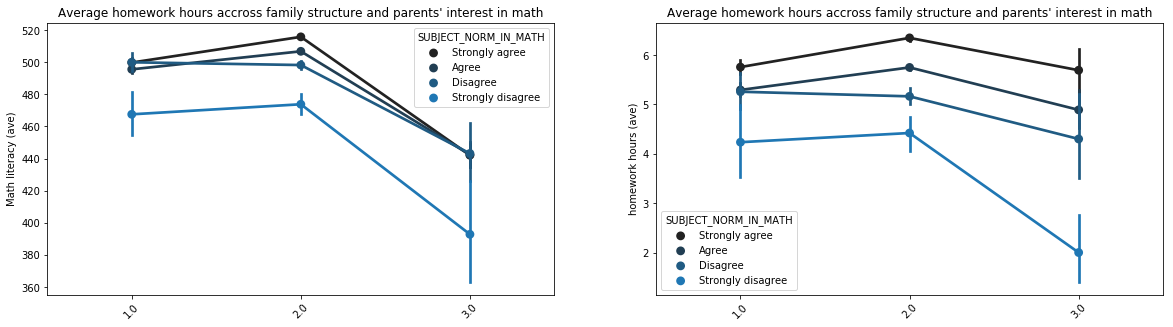

In [29]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
sb.pointplot(data = pisa, x = 'FAMSTRUC', y = 'MATH', hue = 'SUBJECT_NORM_IN_MATH' ,color = base_color)
plt.title("Average homework hours accross family structure and parents' interest in math")
plt.ylabel('Math literacy (ave)')
plt.xlabel(None)
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.pointplot(data = pisa, x = 'FAMSTRUC', y = 'HOMEWORK', hue = 'SUBJECT_NORM_IN_MATH' ,color = base_color)
plt.title("Average homework hours accross family structure and parents' interest in math")
plt.ylabel('homework hours (ave)')
plt.xlabel(None)
plt.xticks(rotation=45);

In [ ]:
! jupyter nbconvert Communicate_Data_Project_Pisa_Part2.ipynb --to slides --post serve --template output_toggle